## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


Matrix A: symmetric=True, positive=True
CG: 61 iterations
SD: 422 iterations
Speedup: 6.9x


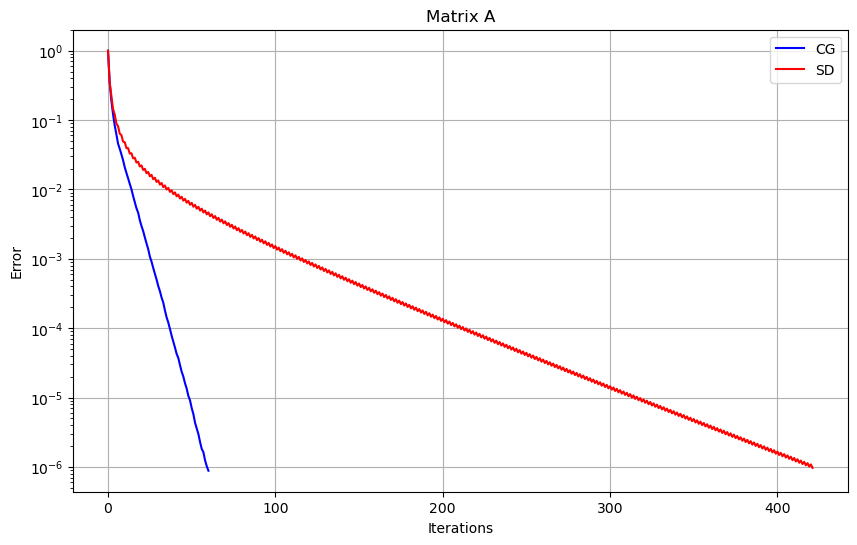

Matrix A1: symmetric=True, positive=True
CG: 421 iterations
SD: 2000 iterations
Speedup: 4.8x


In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Load data
dati = loadmat('testII')
A = dati['A'].astype('float')
A1 = dati['A1'].astype('float')
b = dati['b'].astype('float')
b1 = dati['b1'].astype('float')

# Conjugate Gradient
def cg(A, b, x0, tol=1e-6, max_it=2000):
    x = x0.flatten()
    b = b.flatten()
    r = A @ x - b
    p = -r
    nb = np.linalg.norm(b)
    err = [np.linalg.norm(r) / nb]
    
    for it in range(max_it):
        if err[-1] < tol:
            break
        Ap = A @ p
        alpha = -(r @ p) / (p @ Ap)
        x += alpha * p
        r_old = r.copy()
        r += alpha * Ap
        beta = (r @ r) / (r_old @ r_old)
        p = -r + beta * p
        err.append(np.linalg.norm(r) / nb)
    
    return x.reshape(-1,1), err, it+1

# Steepest Descent
def sd(A, b, x0, tol=1e-6, max_it=2000):
    x = x0.flatten()
    b = b.flatten()
    r = A @ x - b
    nb = np.linalg.norm(b)
    err = [np.linalg.norm(r) / nb]
    
    for it in range(max_it):
        if err[-1] < tol:
            break
        p = -r
        Ap = A @ p
        alpha = -(r @ p) / (p @ Ap)
        x += alpha * p
        r += alpha * Ap
        err.append(np.linalg.norm(r) / nb)
    
    return x.reshape(-1,1), err, it+1

# Check matrix properties
def check(A):
    sym = np.allclose(A, A.T)
    pos = sym and np.all(np.linalg.eigvals(A) > 0)
    return sym, pos

# Solve both systems
for A_curr, b_curr, name in [(A, b, "A"), (A1, b1, "A1")]:
    sym, pos = check(A_curr)
    print(f"Matrix {name}: symmetric={sym}, positive={pos}")
    
    if sym and pos:
        x0 = np.zeros((A_curr.shape[0], 1))
        sol_cg, err_cg, it_cg = cg(A_curr, b_curr, x0)
        sol_sd, err_sd, it_sd = sd(A_curr, b_curr, x0)
        
        print(f"CG: {it_cg} iterations")
        print(f"SD: {it_sd} iterations")
        print(f"Speedup: {it_sd/it_cg:.1f}x")
        
        # Plot
        plt.figure(figsize=(10,6))
        plt.semilogy(err_cg, 'b-', label='CG')
        plt.semilogy(err_sd, 'r-', label='SD')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.legend()
        plt.grid()
        plt.title(f'Matrix {name}')
        plt.show()

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se √® possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perch√® richiamando la teoria e modificare il metodo affinch√® il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**





In [37]:
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    return 2*x**4 - 3.5*x**3 + 0.75*x**2 + x - 0.25

def fd(x):
    return 8*x**3 - 10.5*x**2 + 1.5*x + 1

# Plot
x = np.linspace(-1,2,1000)
y = f(x)
plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.axhline(y = 0 , color="red")
plt.grid()
plt.xlim(-1, 2)
plt.show()

# CORREZIONE 1: Zeri corretti
zeri = [-0.5, 0.25, 1]  # 0.25, NON -0.25!

def newton(f, fd, x0, tol=1e-10, max_it=100):
    errors = []
    x = x0
    
    for i in range(max_it):
        fx = f(x)
        fdx = fd(x)
        if abs(fdx) < 1e-15:
            return None, i , []
        
        x_new = x - fx / fdx
        errors.append(abs(x_new - x))  # SEMPRE calcola errore
        
        if abs(f(x_new)) < tol:
            return x_new, i+1, errors
        
        x = x_new
    return x, max_it, errors
    
def bisezione(f, a, b, tol=1e-10, max_it=200):
    if f(a) * f(b) > 0:
        return None, -1, []
    errors = []
    x_old = a
    
    for i in range(max_it):
        c = ( a + b ) / 2
        fc = f(c)
        
        if i > 0:
            errors.append(abs(c - x_old))
            
        if abs(fc) < tol or (b-a)/2 < tol:
            return c, i+1, errors
        
        if f(a) * fc < 0:
            b = c
        else:
            a = c
            
        x_old = c
    return c, i, errors

# CORREZIONE 2: Intervalli corretti    
intervalli = [(-0.6, -0.4), (0.2, 0.3), (0.9, 1.1)]

print("=== BISEZIONE ===")
for i, (a, b) in enumerate(intervalli):
    print(f"\nIntervallo [{a}, {b}] per zero {zeri[i]}:")
    print(f"f({a}) = {f(a):.3f}, f({b}) = {f(b):.3f}")
    
    if f(a) * f(b) < 0:
        zero, it, err = bisezione(f, a, b)
        print(f"‚úÖ Zero: {zero:.10f} in {it} iterazioni")
    else:
        print("‚ùå ERRORE: f(a)*f(b) > 0 - nessun cambio di segno")

def stima_ordine(error):
    if len(error) < 3:
        return None
    p_values = []
    for i in range(2, len(error)):
        if error[i-1] > 1e-15 and error[i-2] > 1e-15:  # Evita divisione per 0
            p = np.log(error[i] / error[i-1]) / np.log(error[i-1]/error[i-2])
            p_values.append(p)
    return np.mean(p_values) if p_values else None

# CORREZIONE 3: Newton modificato corretto
def newton_mod(f, fd, x0, m=2, tol=1e-10, max_it=100):
    errors = []
    x = x0
    
    for i in range(max_it):
        fx = f(x)
        fdx = fd(x)
        if abs(fdx) < 1e-15:
            return None, i, []
            
        x_new = x - m * fx / fdx
        errors.append(abs(x_new - x))  # SEMPRE calcola errore
        
        if abs(f(x_new)) < tol:
            return x_new, i+1, errors
        
        x = x_new
    return x, max_it, errors

print("\n=== NEWTON ===")
x0_values = [-0.4, 0.3, 0.9]
for i, x0 in enumerate(x0_values):
    print(f"\nPunto iniziale x0 = {x0} per zero {zeri[i]}:")
    zero, it, error = newton(f, fd, x0)
    
    if zero is not None:
        print(f"‚úÖ Zero: {zero:.10f} in {it} iterazioni")
        
        if len(error) >= 3:
            order = stima_ordine(error)
            if order is not None:
                print(f"üìä Ordine stimato: {order:.2f}")
                
                if order < 1.5:
                    print("‚ö†Ô∏è  ORDINE ‚âà 1: Radice multipla!")
                    print("üîß Provo Newton modificato (m=2)...")
                    
                    zero_mod, it_mod, err_mod = newton_mod(f, fd, x0, m=2)
                    if zero_mod is not None and len(err_mod) >= 3:
                        order_mod = stima_ordine(err_mod)
                        print(f"‚úÖ Newton mod: {zero_mod:.10f}")
                        print(f"üìä Ordine mod: {order_mod:.2f}")
                else:
                    print("‚úÖ ORDINE ‚âà 2: Radice semplice")
        else:
            print("‚ùå Troppo poche iterazioni per stimare ordine")
    else:
        print("‚ùå Newton non converge")

print("\nüìñ TEORIA:")
print("- Bisezione: ordine 1, serve f(a)*f(b) < 0")
print("- Newton: ordine 2 (radici semplici), ordine 1 (radici multiple)")
print("- Newton modificato: ripristina ordine 2 per radici multiple")

=== BISEZIONE ===

Intervallo [-0.6, -0.4] per zero -0.5:
f(-0.6) = 0.435, f(-0.4) = -0.255
‚úÖ Zero: -0.5000000000 in 1 iterazioni

Intervallo [0.2, 0.3] per zero 0.25:
f(0.2) = -0.045, f(0.3) = 0.039
‚úÖ Zero: 0.2500000000 in 1 iterazioni

Intervallo [0.9, 1.1] per zero 1:
f(0.9) = 0.018, f(1.1) = 0.027
‚ùå ERRORE: f(a)*f(b) > 0 - nessun cambio di segno

=== NEWTON ===

Punto iniziale x0 = -0.4 per zero -0.5:
‚úÖ Zero: -0.5000000000 in 5 iterazioni
üìä Ordine stimato: 1.91
‚úÖ ORDINE ‚âà 2: Radice semplice

Punto iniziale x0 = 0.3 per zero 0.25:
‚úÖ Zero: 0.2500000000 in 4 iterazioni
üìä Ordine stimato: 2.02
‚úÖ ORDINE ‚âà 2: Radice semplice

Punto iniziale x0 = 0.9 per zero 1:
‚úÖ Zero: 0.9999951386 in 14 iterazioni
üìä Ordine stimato: 0.98
‚ö†Ô∏è  ORDINE ‚âà 1: Radice multipla!
üîß Provo Newton modificato (m=2)...
‚úÖ Newton mod: 1.0000000246
üìä Ordine mod: 1.99

üìñ TEORIA:
- Bisezione: ordine 1, serve f(a)*f(b) < 0
- Newton: ordine 2 (radici semplici), ordine 1 (radici mul

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 -  Fornire alla macchina i dati affinch√® impari da sola a risolvere il problema

 - Fornire alla macchina solo dati etichettati affinch√® impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinch√® impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa √® un Multi-Layer Perceptron?**

-  Una rete multi-livello composta da neuroni completamente connessi

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

- Trasforma i digits della rete in probabilit√†

- Trasforma le probabilit√† della rete in digits

-  Normalizza i valori di input della rete

-  √à indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

¬∑ Nel predire un valore continuo in output

¬∑ Nel predire una classe in output

¬∑ Nel predire un gruppo di appartenenza del dato di input

¬∑ Nel predire una categoria in output

## Domande Aperte

**6. ** Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7 Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

In [ ]:
**